In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



=== REGRESIÓN LINEAL MÚLTIPLE ===


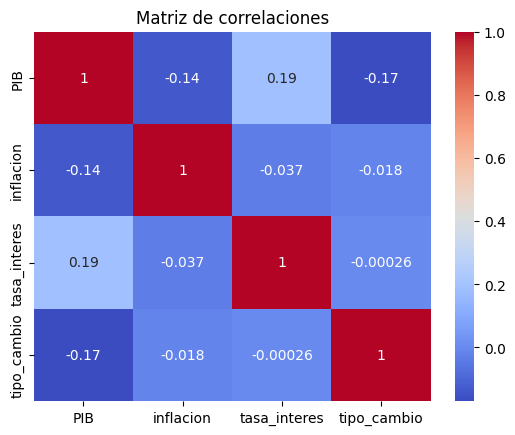

                            OLS Regression Results                            
Dep. Variable:                    PIB   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.894
Date:                Mon, 11 Aug 2025   Prob (F-statistic):             0.0392
Time:                        16:05:08   Log-Likelihood:                -357.69
No. Observations:                 100   AIC:                             723.4
Df Residuals:                      96   BIC:                             733.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          159.0393     35.202      4.518   

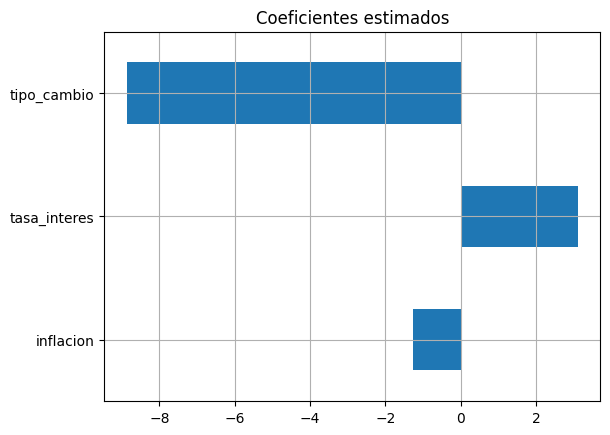


VIF:
       variable          VIF
0         const  1588.715525
1     inflacion     1.001655
2  tasa_interes     1.001345
3   tipo_cambio     1.000311


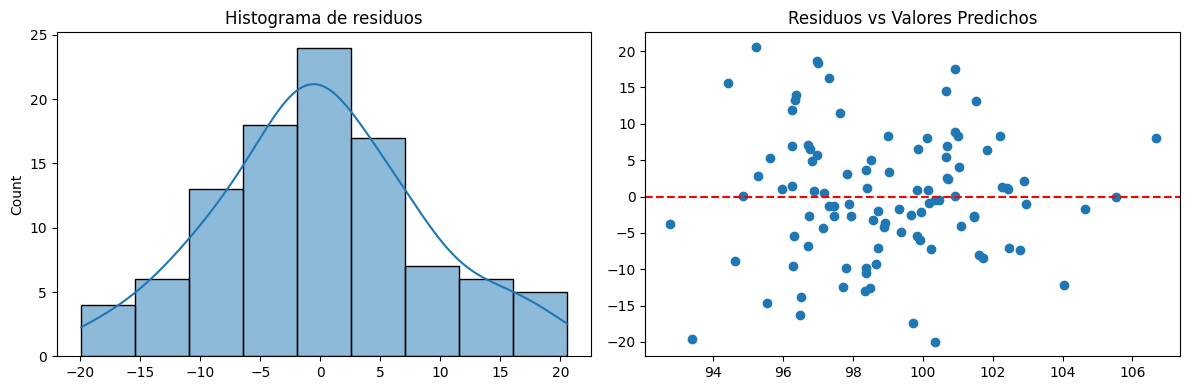


Shapiro-Wilk Test: p-value = 0.6897 → Normal
Test de Breusch-Pagan: p-value = 0.0253 → Heterocedasticidad
Durbin-Watson = 2.03 → Sin autocorrelación importante

=== REGRESIÓN LOGÍSTICA ===

Coeficientes:
X1: β = -0.1024, OR = 0.9026
X2: β = 3.6266, OR = 37.5858
X3: β = -0.5649, OR = 0.5684

               precision    recall  f1-score   support

           0       0.96      0.96      0.96       100
           1       0.96      0.96      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



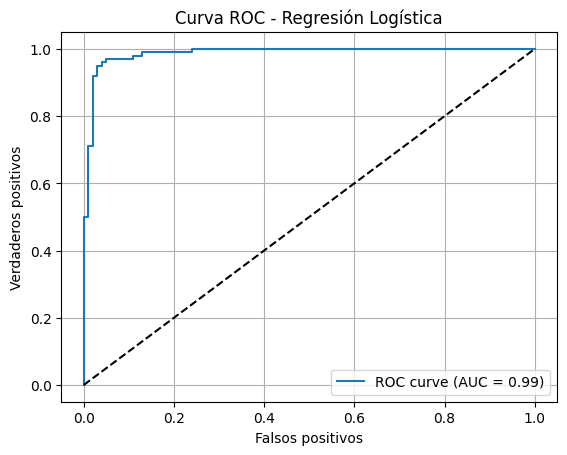

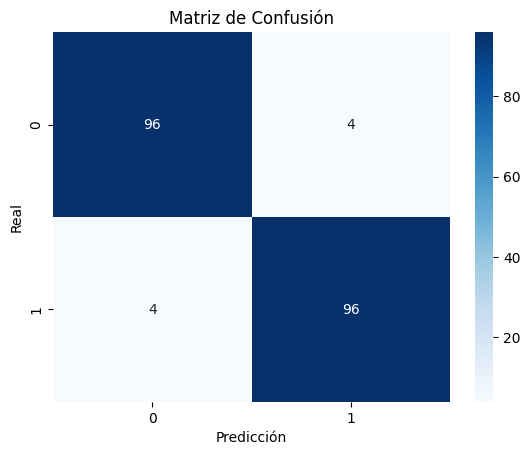

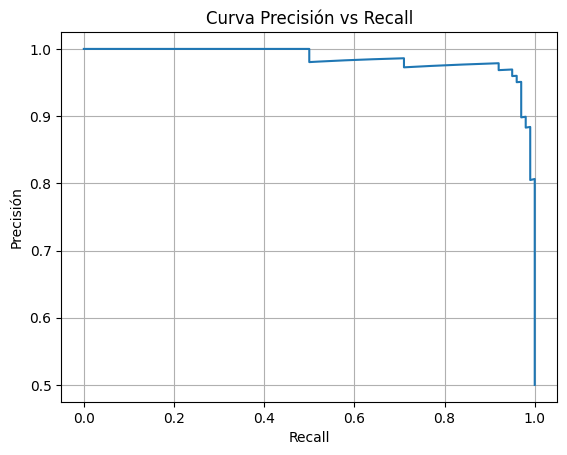

AUC promedio (CV 5-fold): 0.9895

=== ANÁLISIS DE SERIES DE TIEMPO ===


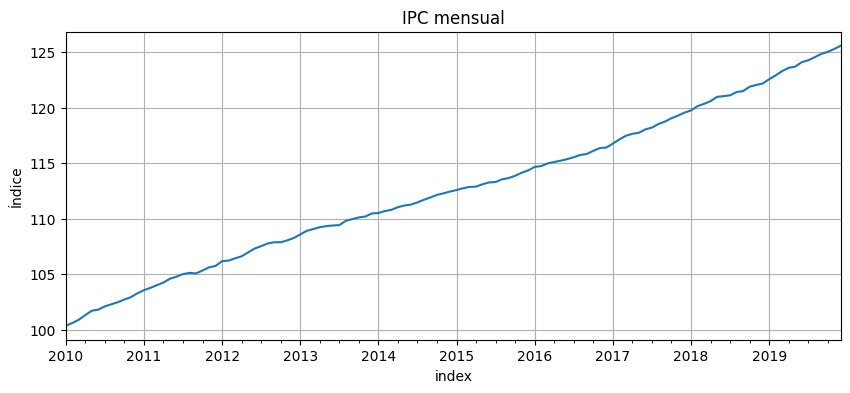


ADF Test: estadístico = 0.7634, p-value = 0.9910


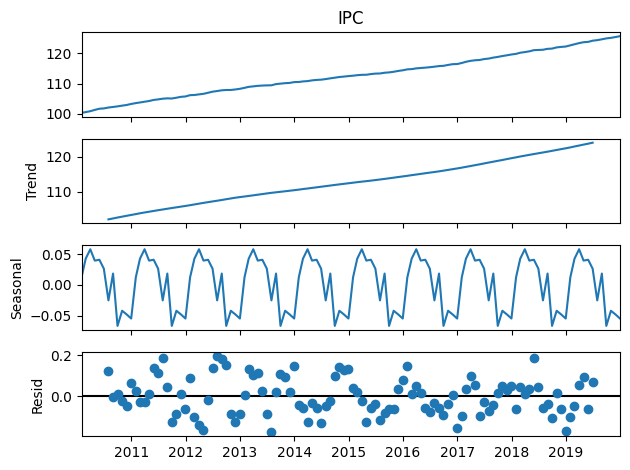

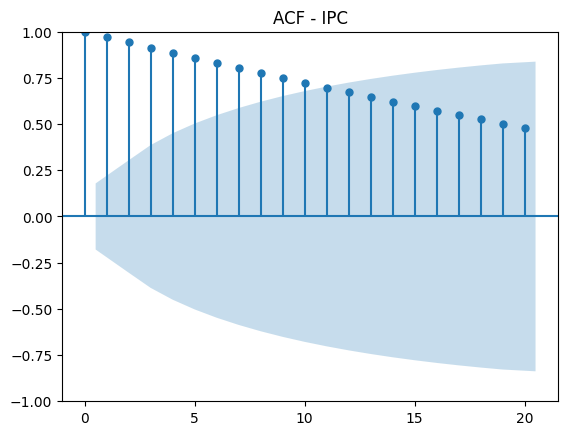

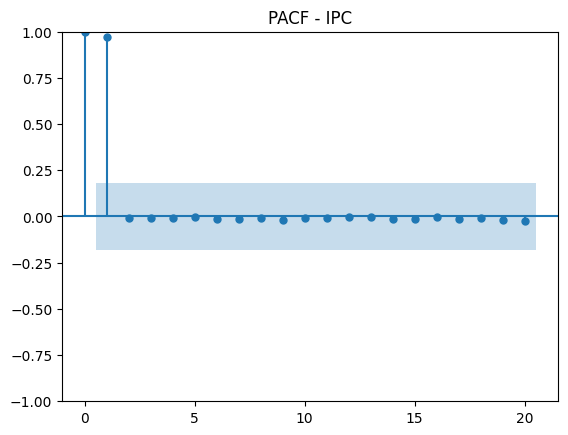

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    IPC   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  99.851
Date:                Mon, 11 Aug 2025   AIC                           -193.702
Time:                        16:05:11   BIC                           -185.365
Sample:                    01-31-2010   HQIC                          -190.317
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.001    689.927      0.000       0.997       1.002
ma.L1         -0.9190      0.040    -23.193      0.000      -0.997      -0.841
sigma2         0.0106      0.002      6.834      0.0

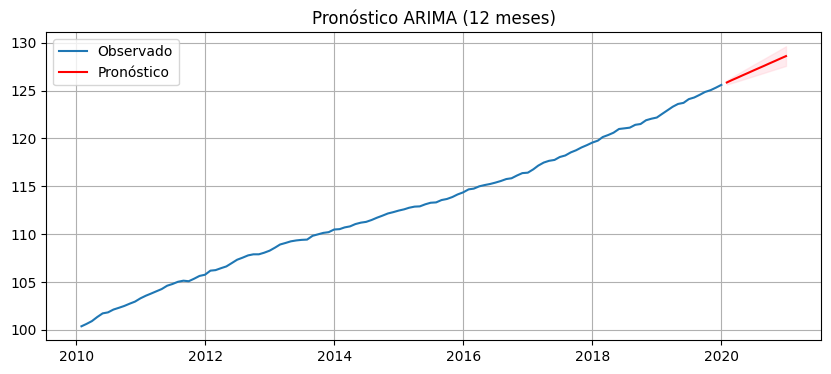

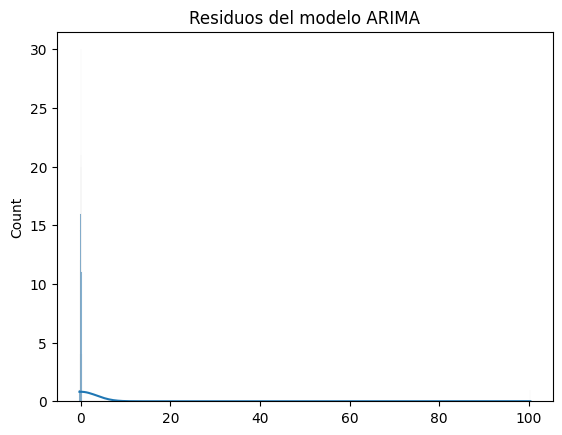


Errores del modelo ARIMA: RMSE = 9.1637, MAE = 0.9220


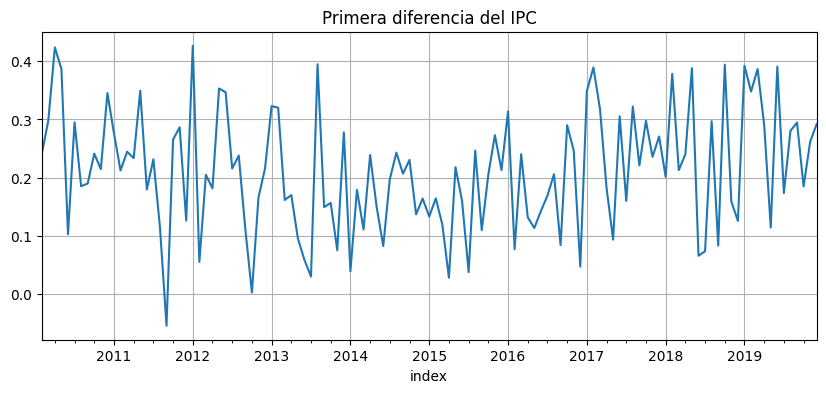

ADF sobre primera diferencia: estadístico = -10.4286, p-value = 0.0000


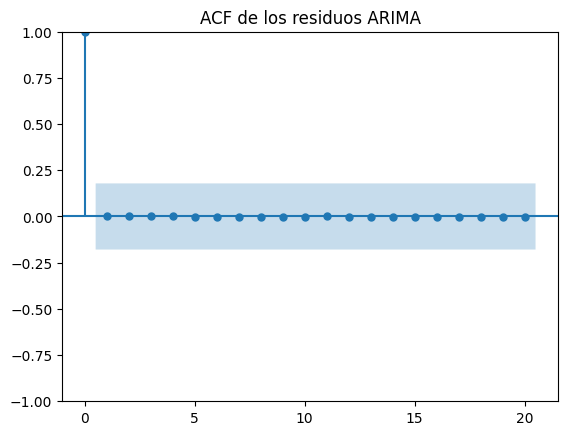

Shapiro-Wilk ARIMA: p-value = 0.0000 → No normal
AIC del modelo: -193.70
BIC del modelo: -185.37
Log-verosimilitud: 99.85


In [4]:
# -*- coding: utf-8 -*-
# script_clase1.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ruta de trabajo
# ruta = r"C:\Users\IVAN JESUS ROMERO\Desktop\inv\CLASE 1"
ruta = r"/content/drive/MyDrive/Econometria Analisis de Datos e IA en software/Modulo 2/Clase_2.Archivos_2"
# ================================
# 1. REGRESIÓN LINEAL MÚLTIPLE
# ================================
print("\n=== REGRESIÓN LINEAL MÚLTIPLE ===")
df_lin = pd.read_csv(ruta + r"/regresion_lineal.csv")

# Matriz de correlaciones
sns.heatmap(df_lin.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

# Modelo
X = df_lin[["inflacion", "tasa_interes", "tipo_cambio"]]
X = sm.add_constant(X)
y = df_lin["PIB"]
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

# Coeficientes
modelo.params.drop("const").plot(kind='barh', title="Coeficientes estimados")
plt.grid(True)
plt.show()

# VIF
X_vif = X.copy()
vif_df = pd.DataFrame()
vif_df["variable"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF:")
print(vif_df)

# Diagnóstico de residuos
resid = modelo.resid
pred = modelo.fittedvalues

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(resid, kde=True)
plt.title("Histograma de residuos")
plt.subplot(1, 2, 2)
plt.scatter(pred, resid)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores Predichos")
plt.tight_layout()
plt.show()

# Test de normalidad
stat, p = shapiro(resid)
print(f"\nShapiro-Wilk Test: p-value = {p:.4f} → {'Normal' if p>0.05 else 'No normal'}")

# Breusch-Pagan (heterocedasticidad)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(resid, X)
print(f"Test de Breusch-Pagan: p-value = {bp_test[1]:.4f} → {'Heterocedasticidad' if bp_test[1]<0.05 else 'Homoscedasticidad'}")

# Durbin-Watson (autocorrelación)
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)
print(f"Durbin-Watson = {dw:.2f} → {'Autocorrelación detectada' if dw<1.5 or dw>2.5 else 'Sin autocorrelación importante'}")

# ================================
# 2. REGRESIÓN LOGÍSTICA
# ================================
print("\n=== REGRESIÓN LOGÍSTICA ===")
df_log = pd.read_csv(ruta + r"/regresion_logistica.csv")
X_log = df_log[["X1", "X2", "X3"]]
y_log = df_log["evento"]

modelo_log = LogisticRegression()
modelo_log.fit(X_log, y_log)
y_pred = modelo_log.predict(X_log)
y_prob = modelo_log.predict_proba(X_log)[:, 1]

# Coeficientes
print("\nCoeficientes:")
for i, col in enumerate(X_log.columns):
    print(f"{col}: β = {modelo_log.coef_[0][i]:.4f}, OR = {np.exp(modelo_log.coef_[0][i]):.4f}")

print("\n", classification_report(y_log, y_pred))

# Curva ROC
fpr, tpr, _ = roc_curve(y_log, y_prob)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc_score(y_log, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid(True)
plt.show()

# Matriz de confusión
conf = confusion_matrix(y_log, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score

# Curva Precisión vs Recall
prec, rec, _ = precision_recall_curve(y_log, y_prob)
plt.figure()
plt.plot(rec, prec)
plt.title("Curva Precisión vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

# Validación cruzada AUC (5 folds)
auc_cv = cross_val_score(modelo_log, X_log, y_log, cv=5, scoring='roc_auc')
print(f"AUC promedio (CV 5-fold): {auc_cv.mean():.4f}")

# ================================
# 3. SERIES DE TIEMPO Y ARIMA
# ================================
print("\n=== ANÁLISIS DE SERIES DE TIEMPO ===")
df_ts = pd.read_csv(ruta + r"/serie_arima.csv", parse_dates=["index"])
df_ts.set_index("index", inplace=True)

# Gráfico de la serie
df_ts["IPC"].plot(title="IPC mensual", figsize=(10, 4))
plt.ylabel("Índice")
plt.grid(True)
plt.show()

# ADF test
adf_result = adfuller(df_ts["IPC"])
print(f"\nADF Test: estadístico = {adf_result[0]:.4f}, p-value = {adf_result[1]:.4f}")

# Descomposición
descomp = seasonal_decompose(df_ts["IPC"], model="additive")
descomp.plot()
plt.tight_layout()
plt.show()

# ACF y PACF
plot_acf(df_ts["IPC"], lags=20)
plt.title("ACF - IPC")
plt.show()

plot_pacf(df_ts["IPC"], lags=20)
plt.title("PACF - IPC")
plt.show()

# Modelo ARIMA
modelo_arima = ARIMA(df_ts["IPC"], order=(1, 1, 1))
resultado = modelo_arima.fit()
print(resultado.summary())

# Pronóstico
pred = resultado.get_forecast(steps=12)
ci = pred.conf_int()

plt.figure(figsize=(10, 4))
plt.plot(df_ts["IPC"], label="Observado")
plt.plot(pred.predicted_mean, label="Pronóstico", color="red")
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="pink", alpha=0.3)
plt.title("Pronóstico ARIMA (12 meses)")
plt.legend()
plt.grid(True)
plt.show()

# Diagnóstico residuos ARIMA
resid_arima = resultado.resid
plt.figure()
sns.histplot(resid_arima, kde=True)
plt.title("Residuos del modelo ARIMA")
plt.show()

# Errores de predicción
true = df_ts["IPC"].iloc[-len(resultado.fittedvalues):]
fitted = resultado.fittedvalues
rmse = np.sqrt(mean_squared_error(true, fitted))
mae = mean_absolute_error(true, fitted)
print(f"\nErrores del modelo ARIMA: RMSE = {rmse:.4f}, MAE = {mae:.4f}")

# Primera diferencia y test ADF
df_ts["dIPC"] = df_ts["IPC"].diff()
df_ts["dIPC"].dropna().plot(title="Primera diferencia del IPC", figsize=(10, 4))
plt.grid(True)
plt.show()

adf_dif = adfuller(df_ts["dIPC"].dropna())
print(f"ADF sobre primera diferencia: estadístico = {adf_dif[0]:.4f}, p-value = {adf_dif[1]:.4f}")

# ACF de residuos
plot_acf(resid_arima, lags=20)
plt.title("ACF de los residuos ARIMA")
plt.show()

# Normalidad de residuos
stat_arima, p_arima = shapiro(resid_arima)
print(f"Shapiro-Wilk ARIMA: p-value = {p_arima:.4f} → {'Normal' if p_arima>0.05 else 'No normal'}")

# Información del modelo
print(f"AIC del modelo: {resultado.aic:.2f}")
print(f"BIC del modelo: {resultado.bic:.2f}")
print(f"Log-verosimilitud: {resultado.llf:.2f}")